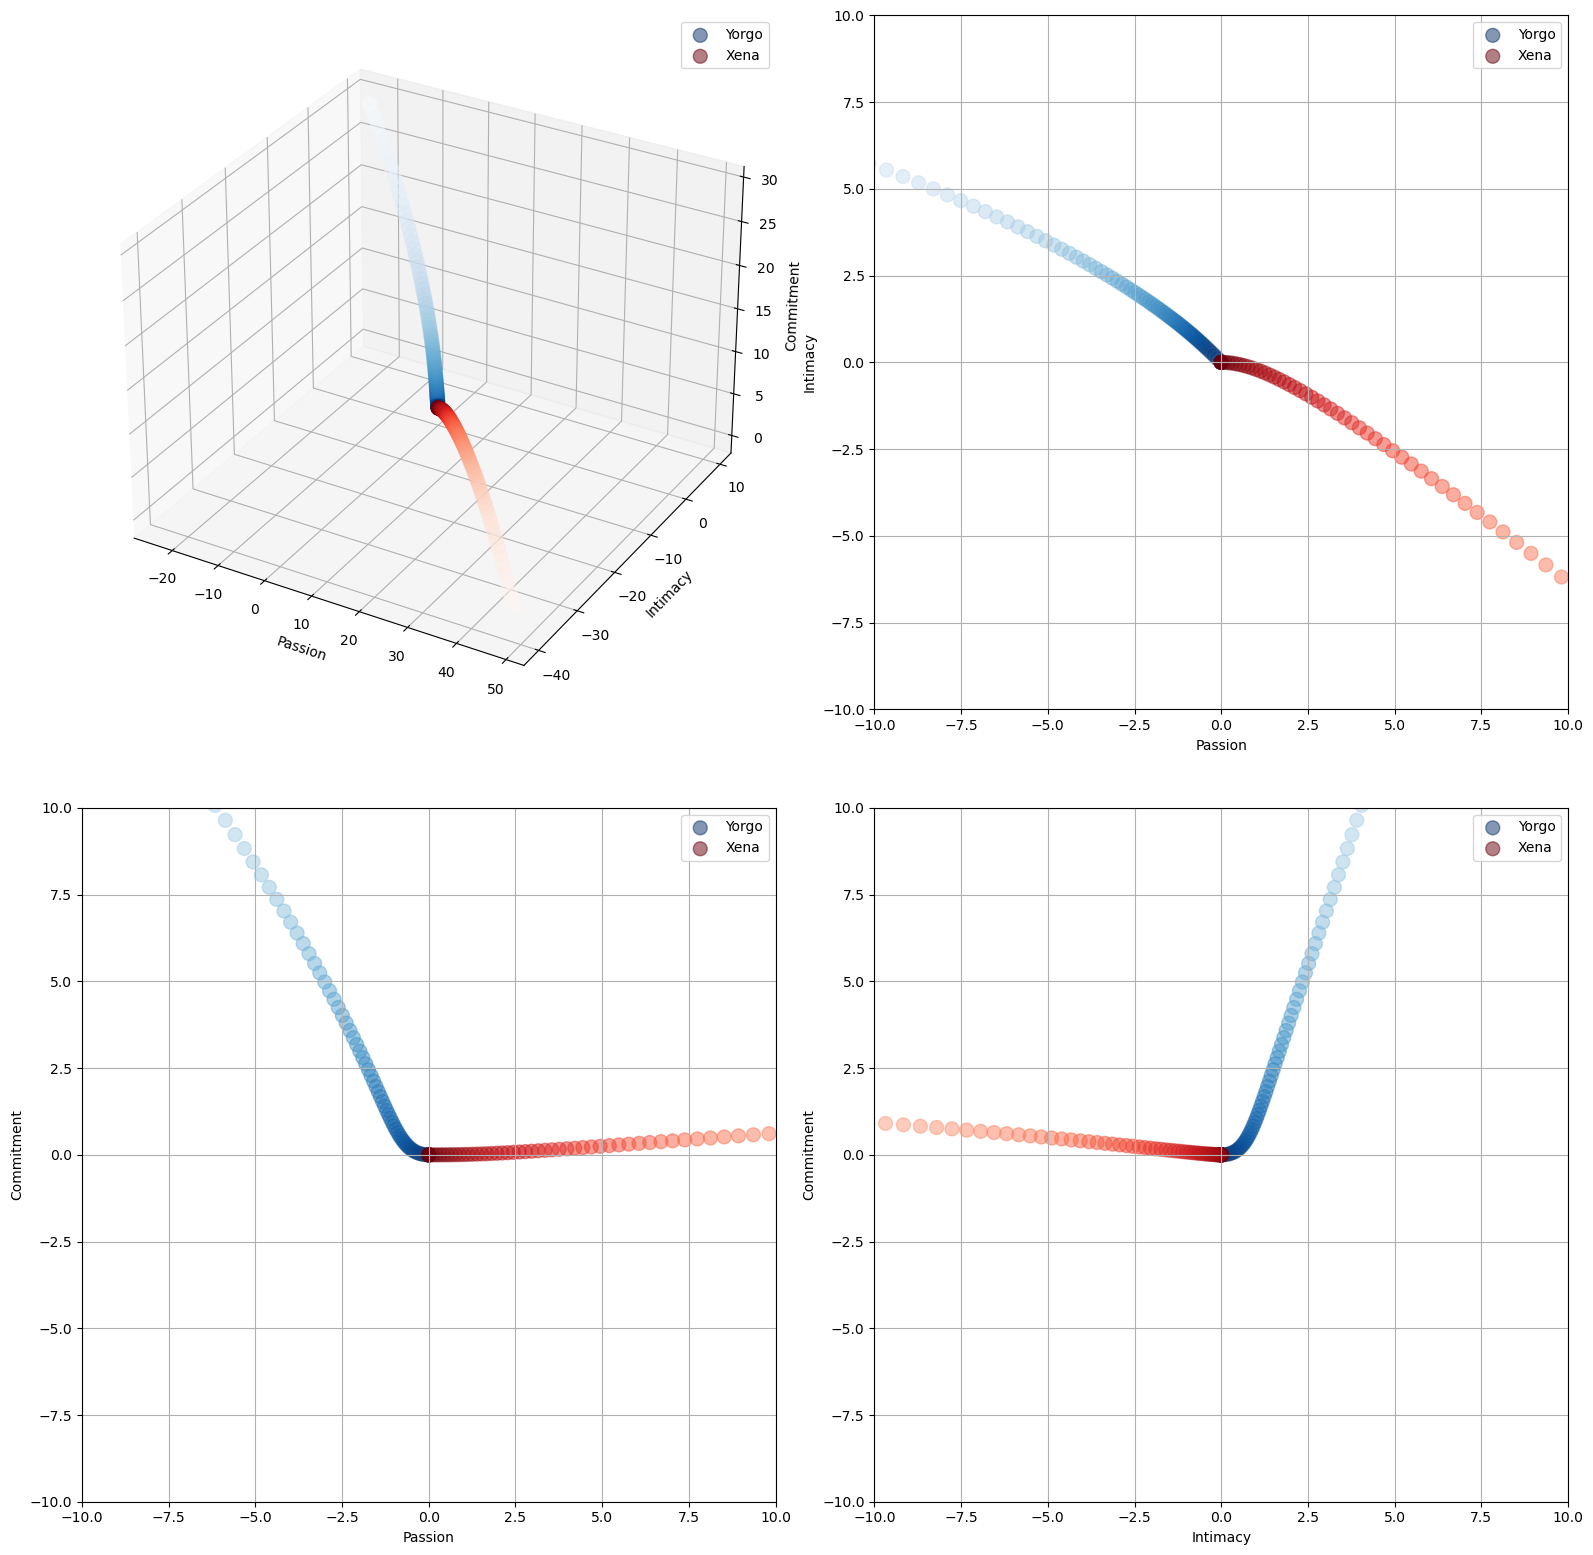

In [2]:
import networkx as nx
import random
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import pickle
random.seed(0)
num = 0


def calculateODE():
    A = np.array([[axx, axy, bxx, bxy, lxx, lxy],
                  [ayx, ayy, byx, byy, lyx, lyy],
                  [cxx, cxy, dxx, dxy, nxx, nxy],
                  [cyx, cyy, dyx, dyy, nyx, nyy],
                  [mxx, mxy, oxx, oxy, pxx, pxy],
                  [myx, myy, oyx, oyy, pyx, pyy]])
    B = np.array([fxy, fyx, gxy, gyx, hxy, hyx])
    vdp1 = lambda T, x: A.dot(x) + B
    sol = solve_ivp(vdp1, [0, 8], np.array([xi0, yi0, xp0, yp0, xc0, yc0]), max_step=0.1)
    return sol



def calculateODEMatrixVector(A, B, x): 
    vdp1 = lambda T, x: A.dot(np.array([x[0], x[1], x[2], x[3]])) + B
    sol = solve_ivp (vdp1, [0, 8], np.array([x[0], x[1], x[2], x[3]]), max_step=0.1)
    return sol


def update_plot():
    sol = calculateODE()
    [t, xa] = [sol.t, sol.y]

    fig = plt.figure(figsize=(16, 16))

    # 3D plot
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(xa[2], xa[0], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax1.scatter(xa[3], xa[1], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax1.set_xlabel('Passion')
    ax1.set_ylabel('Intimacy')
    ax1.set_zlabel('Commitment')
    ax1.legend()

    # XY Projection
    ax2 = fig.add_subplot(222)
    ax2.scatter(xa[2], xa[0], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax2.scatter(xa[3], xa[1], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax2.set_xlabel('Passion')
    ax2.set_ylabel('Intimacy')
    ax2.set_xlim([-10, 10])
    ax2.set_ylim([-10, 10])
    ax2.grid()
    ax2.legend()
    ax2.set_aspect('equal', adjustable='box')

    # XZ Projection
    ax3 = fig.add_subplot(223)
    ax3.scatter(xa[2], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax3.scatter(xa[3], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax3.set_xlabel('Passion')
    ax3.set_ylabel('Commitment')
    ax3.set_xlim([-10, 10])
    ax3.set_ylim([-10, 10])
    ax3.grid()
    ax3.legend()
    ax3.set_aspect('equal', adjustable='box')

    # YZ Projection
    ax4 = fig.add_subplot(224)
    ax4.scatter(xa[0], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax4.scatter(xa[1], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax4.set_xlabel('Intimacy')
    ax4.set_ylabel('Commitment')
    ax4.set_xlim([-10, 10])
    ax4.set_ylim([-10, 10])
    ax4.grid()
    ax4.legend()
    ax4.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()

    

# Parameters
# Intimacy and Passion Dynamics for Xena
axx = -0.2  # Forgetting coefficient of the intimacy of Xena to Yorgo.
axy = -0.4  # If Yorgo’s intimacy increases, Xena’s will decrease, and if it decreases, it will increase.
bxx = +0.5  # If Xena’s passion increases, her sense of intimacy increases, and if it decreases, it decreases.
bxy = -0.2  # As Yorgo’s passion for Xena increase, Xena’s closeness to Yorgo decreases.
cxx = +0.3  # Her passion increase when Xena feels close. Men with whom she does not feel close are not attractive.
cxy = +0.7  # Intimate men are very attractive to Xena. Her passion for men who do not behave closely is significantly reduced.
dxx = -0.1  # Forgetting coefficient of the passion of Xena for Yorgo.
dxy = +0.4  # As Yorgo’s passion grows, so does Xena’s. A man who acts romantic may attract her.

# Intimacy and Passion Dynamics for Yorgo
ayy = -0.2  # Forgetting coefficient of the intimacy of Yorgo to Xena.
ayx = +0.6  # If Yorgo’s intimacy increases, Xena’s will decrease, if it decreases, it will increase.
byy = -0.5  # If Yorgo’s passion increases, his sense of intimacy decreases, and if it decreases, it increases.
byx = +0.6  # As Xena’s passion for Yorgo increases, Yorgo’s intimacy with Xena increases.
cyy = -0.3  # His passion decreases when Yorgo feels close. Women with whom he does not feel close are attractive.
cyx = -0.1  # Intimate women are not attractive to Yorgo. His passion for women who are close to him weakens a little.
dyy = -0.1  # Forgetting coefficient of the passion of Yorgo to Xena.
dyx = -0.4  # Effect of Xena's passion on Yorgo's passion. As Xena’s passion increases, Yorgo’s decreases.

# Impression coefficients
fxy = +1.0  # Xena’s impression of intimacy or friendship with Yorgo. She finds Yorgo intimate and friendly.
gyx = +1.0  # Yorgo’s impression of glamourousness or attractiveness about Xena. He finds Xena attractive and desires her romantically and sexually.
fyx = +0.0  # Yorgo’s impression of intimacy or friendship with Xena. Yorgo found Xena neither sympathetic nor antipathetic.
gxy = -1.0  # Xena’s impression of glamourousness or attractiveness about Yorgo. She does not find Yorgo romantically or sexually attractive.
hxy = +0.0  # Xena's impression of commitment to Yorgo. She does not find Yorgo committed to her.
hyx = +0.0  # Yorgo's impression of commitment to Xena. He does not find Xena committed to him.


# Commitment Dynamics
lxx = 0.3  # Influence of Xena's commitment on her own intimacy. She's more intimate with Yorgo because she's committed to him.
lxy = 0.2  # Influence of Yorgo's commitment on Xena's intimacy. She is more intimate with Yorgo because he is committed to her.
lyy = 0.1  # Influence of Yorgo's commitment on his own intimacy. He is more intimate with Xena because he is committed to her.
lyx = 0.1  # Influence of Xena's commitment on Yorgo's intimacy. The more she is committed to him, the more intimate he is with her.

mxx = 0.1  # Influence of Xena's intimacy on her own commitment. She is committed to Yorgo because she feels close to him.
mxy = 0.5  # Influence of Yorgo's intimacy on Xena's commitment. She is committed to Yorgo because he feels close to her.
myy = 0.0  # Influence of Yorgo's intimacy on his own commitment. His intimacy does not affect his commitment.
myx = 0.1  # Influence of Xena's intimacy on Yorgo's commitment. Her intimacy makes him slightly more committed to her.

nxx = -0.3  # Influence of Xena's commitment on her own passion. The more she is committed to Yorgo, the less passionate she is about him.
nxy = 0.4  # Influence of Yorgo's commitment on Xena's passion. The more he is committed to her, the more passionate she is about him.
nyy = 0.1  # Influence of Yorgo's commitment on his own passion. The more he is committed to Xena, the more passionate he is about her.
nyx = 0.2  # Influence of Xena's commitment on Yorgo's passion. The more she is committed to him, the more passionate he is about her.

oxx = -0.1  # Influence of Xena's passion on her own commitment. Her own passion scares her away.
oxy = 0.7  # Influence of Yorgo's passion on Xena's commitment. Yorgo's passion makes her more committed to him.
oyy = 0.2  # Influence of Yorgo's passion on his own commitment. The more he is passionate about Xena, the more committed he is to her.
oyx = 0.3  # Influence of Xena's passion on Yorgo's commitment. The more she is passionate about him, the more committed he is to her.

pxx = -0.2   # Forgetting coefficient of the commitment of Xena to Yorgo.
pxy = 0.1   # As Yorgo's commitment increases, Xena's commitment increases.
pyx = -0.1   # As Xena's commitment increases, Yorgo's commitment decreases.
pyy = -0.1   # Forgetting coefficient of the commitment of Yorgo to Xena.


# Initial Conditions
xi0 = 0.0   # Initial intimacy level for Xena
yi0 = 0.0   # Initial intimacy level for Yorgo
xp0 = 0.0   # Initial passion level for Xena
yp0 = 0.0   # Initial passion level for Yorgo
xc0 = 0.0   # Initial commitment level for Xena
yc0 = 0.0   # Initial commitment level for Yorgo



update_plot()

